In [1]:
# 1) what was the change in price of the stock?
# 2) the daily return of the stock average?
# 3) the moving avg of the various stocks?
# 4) the correlation betwenn diffrent stocks  closing prices?
# 5) the correlation betwenn diffrent stocks daily returns?
# 6) the value do we put at risk by investing in a particular stock?
# 7) how can attempt to predict future stock behavior?

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
sb.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data, wb

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

In [8]:
strt = datetime(end.year-1, end.month, end.day)

In [9]:
import pandas_datareader as pdr

In [10]:
for stk in tech:
    globals()[stk] = pdr.DataReader(stk,'google',strt,end)

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-23,95.87,97.19,95.67,96.43,37860535
2016-05-24,97.22,98.09,96.84,97.90,35036561
2016-05-25,98.67,99.74,98.11,99.62,38168760
2016-05-26,99.68,100.73,98.64,100.41,56093437
2016-05-27,99.44,100.47,99.24,100.35,36229530


In [12]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-23,706.53,711.48,704.18,704.24,1320927
2016-05-24,706.86,720.97,706.86,720.09,1920411
2016-05-25,720.76,727.51,719.70,725.27,1629198
2016-05-26,722.87,728.33,720.28,724.12,1542866
2016-05-27,724.01,733.94,724.00,732.66,1974026


In [13]:
GOOG.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,790.040518,794.877331,785.383187,790.472390,1.524057e+06
std,54.268499,54.285206,54.518224,54.548765,6.556706e+05
min,671.000000,672.300000,663.280000,668.260000,5.874210e+05
25%,764.370000,770.120000,759.070000,762.540000,1.108766e+06
50%,783.330000,789.430000,780.110000,784.680000,1.341807e+06
75%,822.035000,826.185000,818.725000,823.330000,1.694102e+06
max,940.000000,943.110000,937.580000,943.000000,4.745183e+06


In [14]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-05-23 to 2017-05-19
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


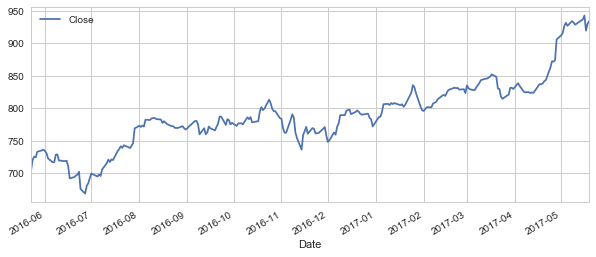

In [15]:
GOOG['Close'].plot(legend=True,figsize=(10,4))

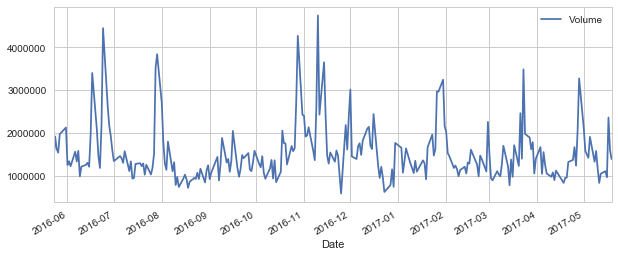

In [16]:
GOOG['Volume'].plot(legend=True,figsize=(10,4))

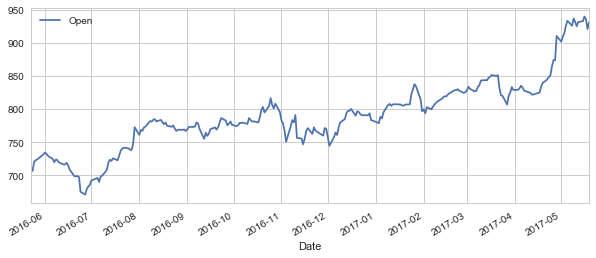

In [17]:
GOOG['Open'].plot(legend=True,figsize=(10,4))

In [18]:
mday = [10,20,50]
for mav in mday:
    columname = "MA %s days" %(str(mav))
    GOOG[columname] =pd.rolling_mean(GOOG['Close'],mav)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [19]:
GOOG[['Close','MA of 10 days','MA of 20 days','MA of 50 days']].plot(subplots=False,figsize=(10,4))

KeyError: "['MA of 10 days' 'MA of 20 days' 'MA of 50 days'] not in index"

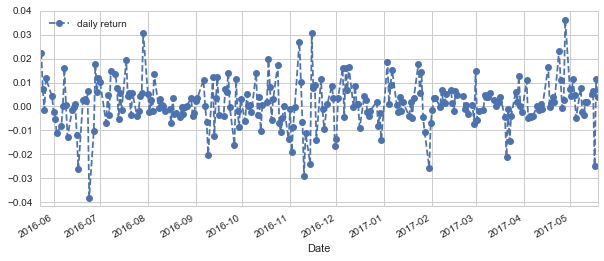

In [20]:
GOOG['daily return'] = GOOG['Close'].pct_change()
GOOG['daily return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


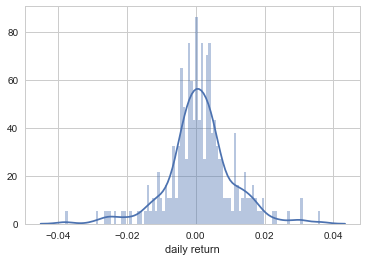

In [21]:
sb.distplot(GOOG['daily return'].dropna(),bins=100)

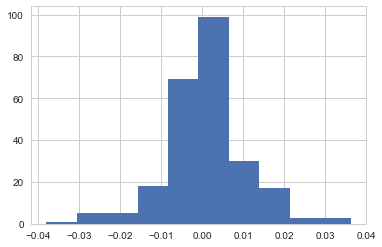

In [22]:
GOOG['daily return'].hist()

In [23]:
cldf = pdr.DataReader(tech,'google',strt,end)['Close']

In [24]:
cldf.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-05-23,96.43,696.75,704.24,50.03
2016-05-24,97.90,704.20,720.09,51.59
2016-05-25,99.62,708.35,725.27,52.12
2016-05-26,100.41,714.91,724.12,51.89
2016-05-27,100.35,712.24,732.66,52.32


In [25]:
techrets = cldf.pct_change()

In [26]:
techrets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-05-23,NaN,NaN,NaN,NaN
2016-05-24,0.015244,0.010693,0.022507,0.031181
2016-05-25,0.017569,0.005893,0.007194,0.010273
2016-05-26,0.007930,0.009261,-0.001586,-0.004413
2016-05-27,-0.000598,-0.003735,0.011794,0.008287


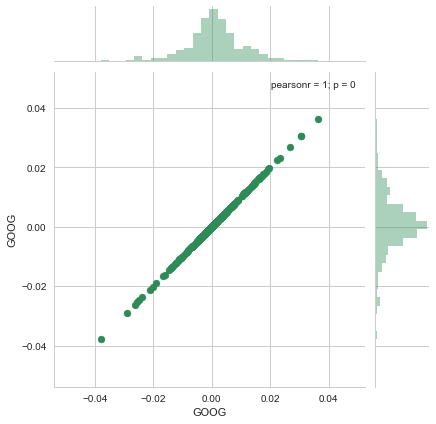

In [27]:
sb.jointplot('GOOG','GOOG',techrets,kind='scatter',color='seagreen')

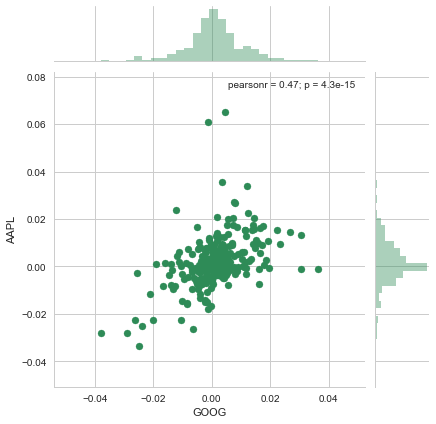

In [28]:
sb.jointplot('GOOG','AAPL',techrets,kind='scatter',color='seagreen')

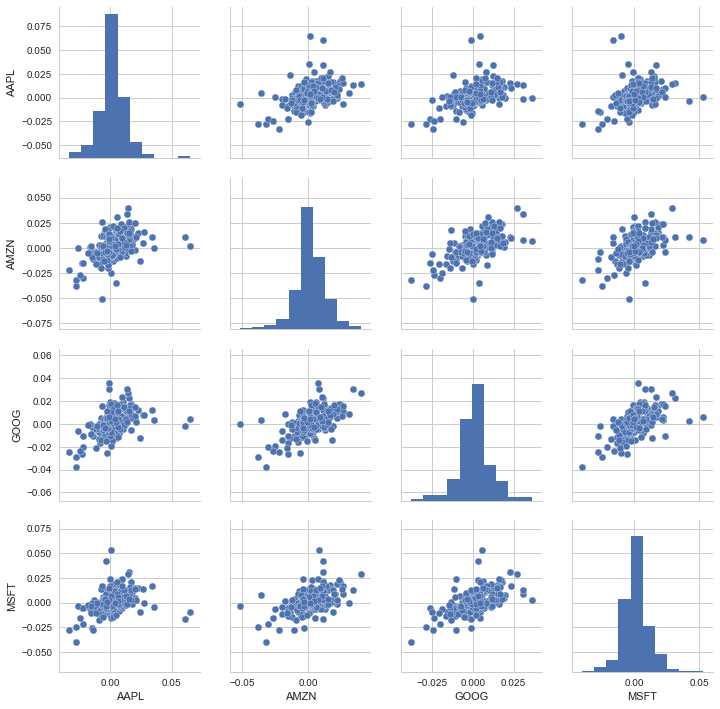

In [29]:
sb.pairplot(techrets.dropna())

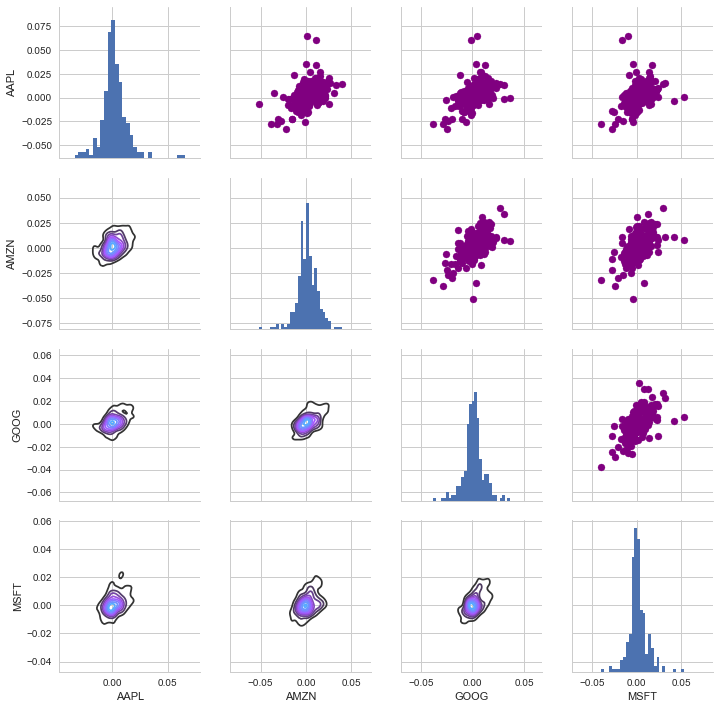

In [30]:
retfig = sb.PairGrid(techrets.dropna())

retfig.map_upper(plt.scatter,color='purple')

retfig.map_lower(sb.kdeplot,cmap='cool_d')

retfig.map_diag(plt.hist,bins=30)

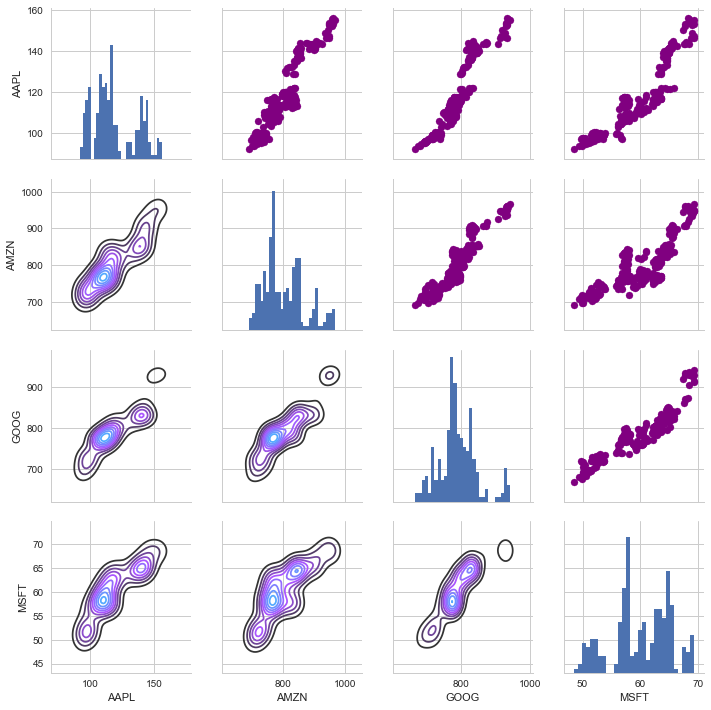

In [31]:
retfig = sb.PairGrid(cldf)

retfig.map_upper(plt.scatter,color='purple')

retfig.map_lower(sb.kdeplot,cmap='cool_d')

retfig.map_diag(plt.hist,bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


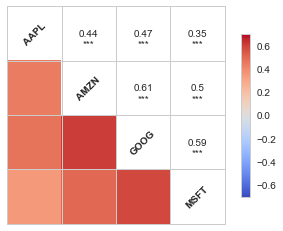

In [32]:
 sb.linearmodels.corrplot(techrets.dropna(),annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


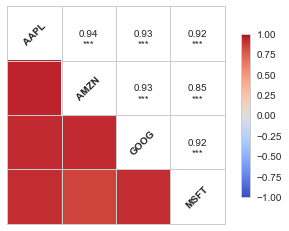

In [33]:
 sb.linearmodels.corrplot(cldf.dropna(),annot=True)

In [34]:
#analysing the risk of the stock

In [35]:
rets = techrets.dropna()

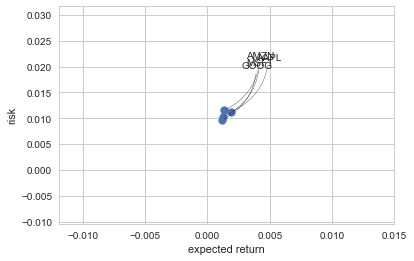

In [36]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('expected return')
plt.ylabel('risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


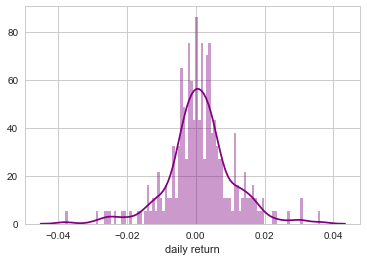

In [37]:
# Value at risk using the "bootstrap" method
sb.distplot(GOOG['daily return'].dropna(),bins=100,color='purple')

In [38]:
# The 0.05 empirical quantile of daily returns
rets['GOOG'].quantile(0.05)

-0.01394512550446646

In [39]:
#Value at Risk using the Monte Carlo method

In [40]:
days = 365
# delta
dt = 1/days
#(drift)
mu = rets.mean()['GOOG']
# average return
sigma = rets.std()['GOOG']

In [52]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [42]:
GOOG.head()


,Open,High,Low,Close,Volume,MA 10 days,MA 20 days,MA 50 days,daily return
Date,,,,,,,,,
2016-05-23,706.53,711.48,704.18,704.24,1320927,NaN,NaN,NaN,NaN
2016-05-24,706.86,720.97,706.86,720.09,1920411,NaN,NaN,NaN,0.022507
2016-05-25,720.76,727.51,719.70,725.27,1629198,NaN,NaN,NaN,0.007194
2016-05-26,722.87,728.33,720.28,724.12,1542866,NaN,NaN,NaN,-0.001586
2016-05-27,724.01,733.94,724.00,732.66,1974026,NaN,NaN,NaN,0.011794


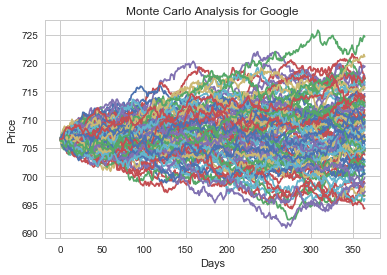

In [53]:
start_price = 706.53

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [54]:
runs = 10000
# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in  range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

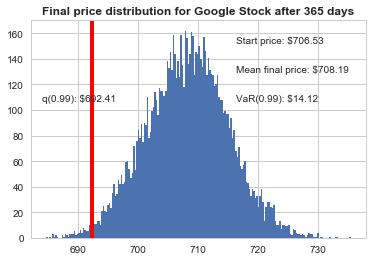

In [55]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');